<a href="https://colab.research.google.com/github/Logeshwari-12345/Cracking-the-market-code-with-AI-driven-stock-price-presentation-using-time-series-analysis-/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0270
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0011
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 9.7850e-04
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 9.2814e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 7.8406e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 7.8512e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 7.3966e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 8.5732e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 7.6316e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 7.4253e-04
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 6.8026e-04
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 7.0666e-04
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.9032e-04
Epoch 15/20
61/61 ━━━━━━━━━

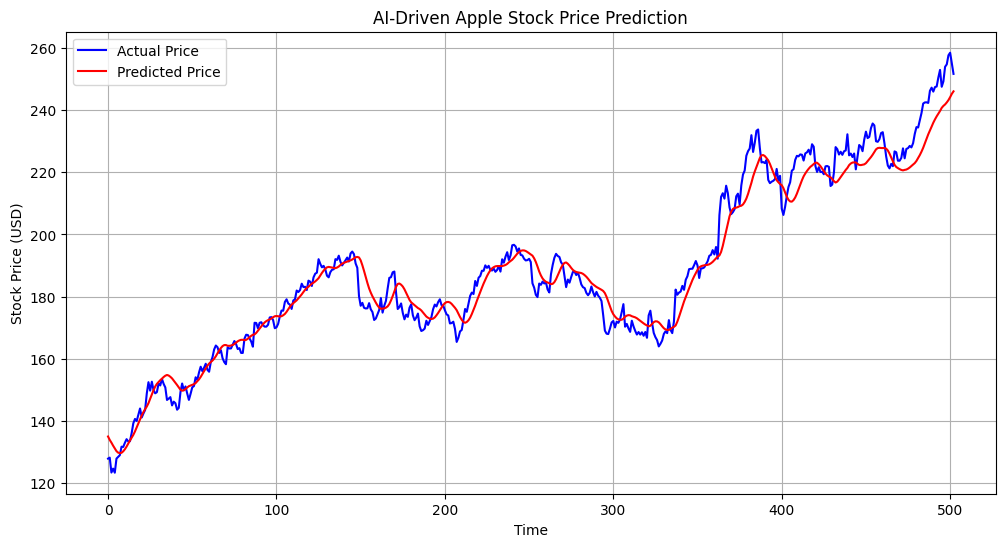

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 2. Data Collection
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
df = df[['Close']]  # Use only the 'Close' column

# 3. Preprocessing
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# 4. Create Time Series Data
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Train-Test Split
training_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:training_size]
test_data = df_scaled[training_size - 60:]  # Include overlap for continuity

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape to 3D for LSTM: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 5. Model Building
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# 6. Prediction
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Visualization
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price', color='blue')
plt.plot(predicted, label='Predicted Price', color='red')
plt.title('AI-Driven Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()